In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Tue Jun 15 12:22:46 2021


In [2]:
### This box uploads all information and renames the columns based on the naming conventions used by the TimePix file creation system. 
### In new experiments there may be more or less columns, or they may be differently named. 
### It is important to check all errors and that the resulting DataFrame makes sense and has all expected information. 
filename = 'x_402.5_y_153.5'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

,y,x,time,center flux,cluster size
0,92,63,0,325,1
1,97,48,3736064,2150,6
2,77,62,4718592,3775,9
3,81,7,37195008,325,1
4,19,114,42797312,2525,7
...,...,...,...,...,...
1282935,84,60,16594460783360,1775,6
1282936,153,55,16594466268672,400,4
1282937,34,74,16594475875584,2600,7
1282938,99,55,16594483506944,1250,4


In [3]:
new_filename = 'yscan_153s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,92,63,0,325,1
1,97,48,3736064,2150,6
2,77,62,4718592,3775,9
3,81,7,37195008,325,1
4,19,114,42797312,2525,7
...,...,...,...,...,...
1282935,84,60,16594460783360,1775,6
1282936,153,55,16594466268672,400,4
1282937,34,74,16594475875584,2600,7
1282938,99,55,16594483506944,1250,4


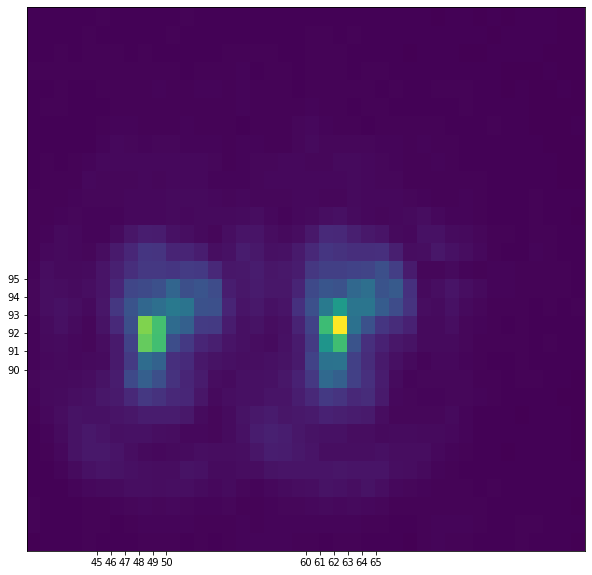

In [4]:
# This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
# Helpful also to identify the locaitons of the ions.
plt.figure(figsize=(10, 10))
#filename = 'xscan_399s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(80, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

yscan_153s          Unnamed: 0    y    x            time  center flux  cluster size
0                 0   92   63               0          325             1
1                 1   97   48         3736064         2150             6
2                 2   77   62         4718592         3775             9
3                 3   81    7        37195008          325             1
4                 4   19  114        42797312         2525             7
...             ...  ...  ...             ...          ...           ...
1282935     1282935   84   60  16594460783360         1775             6
1282936     1282936  153   55  16594466268672          400             4
1282937     1282937   34   74  16594475875584         2600             7
1282938     1282938   99   55  16594483506944         1250             4
1282939     1282939  102   60  16594484149248         3575             9

[1282940 rows x 6 columns]


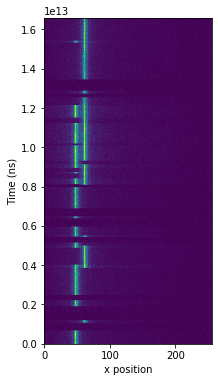

In [5]:
# Check the data over time to see if there are times in which the chain is broken or melted. 
# Find start and end of the broken crystal times and plug that into the start and end variables. 
fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

print (new_filename,it)

In [22]:
filename = 'x_402.5_y_154.5'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it


,y,x,time,center flux,cluster size
0,88,61,0,1275,4
1,88,72,18788608,975,4
2,14,199,26684416,2125,7
3,79,64,112149504,1200,4
4,118,253,120302592,2500,7
...,...,...,...,...,...
1315006,187,40,16594416642048,2375,7
1315007,143,76,16594435939584,1100,4
1315008,54,69,16594437341184,2300,7
1315009,22,94,16594451884800,2075,7


In [24]:
new_filename = 'yscan_154s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,88,61,0,1275,4
1,88,72,18788608,975,4
2,14,199,26684416,2125,7
3,79,64,112149504,1200,4
4,118,253,120302592,2500,7
...,...,...,...,...,...
1315006,187,40,16594416642048,2375,7
1315007,143,76,16594435939584,1100,4
1315008,54,69,16594437341184,2300,7
1315009,22,94,16594451884800,2075,7


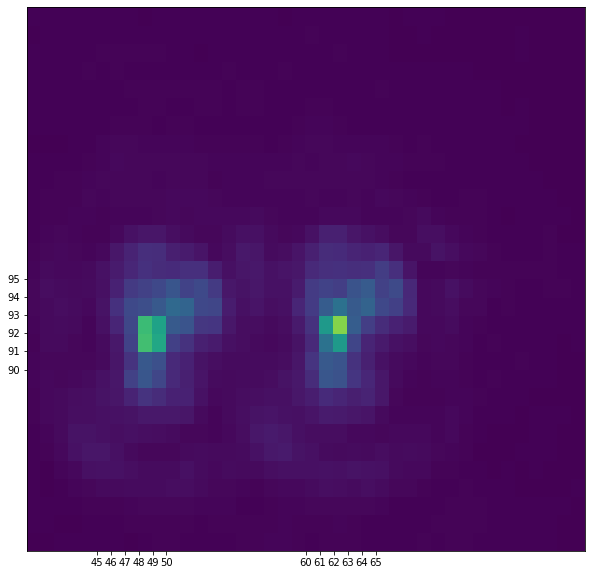

In [8]:
plt.figure(figsize=(10, 10))
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(80, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92


yscan_154s            y    x            time  center flux  cluster size
0         88   61               0         1275             4
1         88   72        18788608          975             4
2         14  199        26684416         2125             7
3         79   64       112149504         1200             4
4        118  253       120302592         2500             7
...      ...  ...             ...          ...           ...
1315006  187   40  16594416642048         2375             7
1315007  143   76  16594435939584         1100             4
1315008   54   69  16594437341184         2300             7
1315009   22   94  16594451884800         2075             7
1315010  219  124  16594464644608          975             4

[1315011 rows x 5 columns]


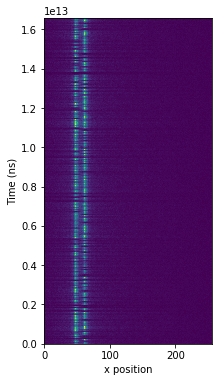

In [25]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)



print (new_filename,it)

In [26]:
filename = 'x_402.5_y_154'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'yscan_154'
it.to_csv(new_filename)  ##### changes actual file
it



,y,x,time,center flux,cluster size
0,143,114,0,2875,7
1,88,59,45746432,2650,7
2,28,143,47582720,1625,4
3,98,56,50722304,1250,3
4,85,68,99041536,800,4
...,...,...,...,...,...
1405589,193,27,16593781337344,1325,4
1405590,96,61,16593796545024,1850,6
1405591,98,105,16593825983488,1400,4
1405592,133,89,16593834131712,3250,7


yscan_154          Unnamed: 0    y    x            time  center flux  cluster size
0                 0  143  114               0         2875             7
1                 1   88   59        45746432         2650             7
2                 2   28  143        47582720         1625             4
3                 3   98   56        50722304         1250             3
4                 4   85   68        99041536          800             4
...             ...  ...  ...             ...          ...           ...
1405589     1405589  193   27  16593781337344         1325             4
1405590     1405590   96   61  16593796545024         1850             6
1405591     1405591   98  105  16593825983488         1400             4
1405592     1405592  133   89  16593834131712         3250             7
1405593     1405593   70   63  16593860051712         2125            10

[1405594 rows x 6 columns]


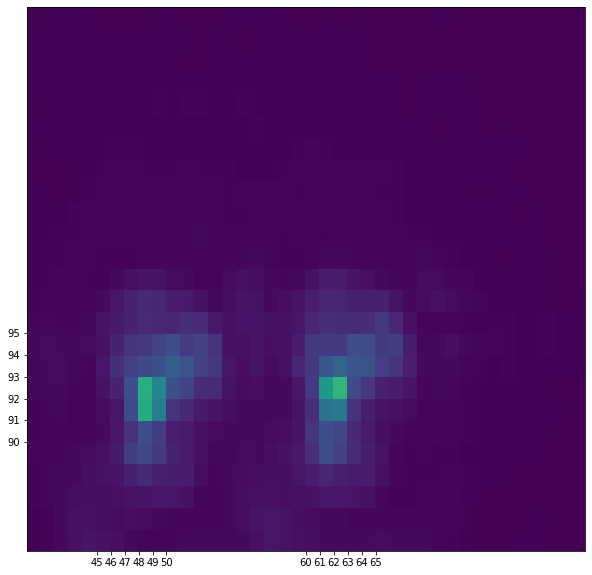

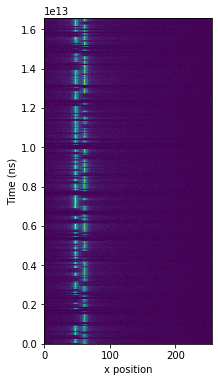

In [27]:
plt.figure(figsize=(10, 10))
#filename = 'yscan_154'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92

#---------------------------------------------------------------

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
#start = 0.51e13; end = 0.525e13; duration = end - start
#ax0.set_ylim(start, end)

print (new_filename,it)

In [12]:
filename = 'x_402.5_y_155.5'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'yscan_155s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,55,106,0,2000,5
1,143,71,3425536,4950,9
2,90,62,6220288,2050,6
3,164,34,56967680,3575,9
4,90,48,92417792,1325,4
...,...,...,...,...,...
1315587,82,91,16594816536832,1775,5
1315588,79,60,16594828295424,375,8
1315589,210,89,16594842438656,2300,8
1315590,109,65,16594849046016,1100,6


yscan_155s          Unnamed: 0    y    x            time  center flux  cluster size
0                 0   55  106               0         2000             5
1                 1  143   71         3425536         4950             9
2                 2   90   62         6220288         2050             6
3                 3  164   34        56967680         3575             9
4                 4   90   48        92417792         1325             4
...             ...  ...  ...             ...          ...           ...
1315587     1315587   82   91  16594816536832         1775             5
1315588     1315588   79   60  16594828295424          375             8
1315589     1315589  210   89  16594842438656         2300             8
1315590     1315590  109   65  16594849046016         1100             6
1315591     1315591   43   12  16594892407552         1425             5

[1315592 rows x 6 columns]


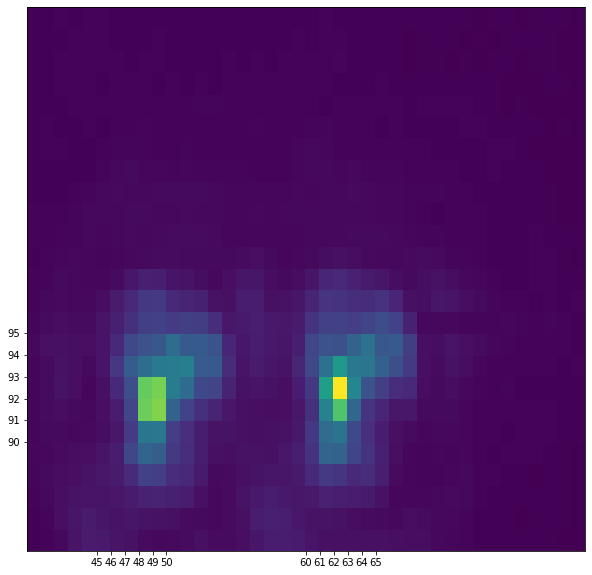

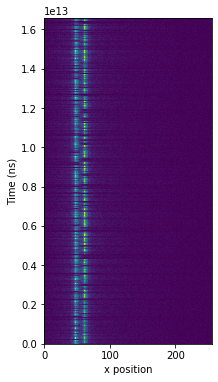

In [13]:
plt.figure(figsize=(10, 10))
#filename = 'yscan_155s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)


In [14]:
filename = 'x_402.5_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'yscan_155'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,88,53,0,675,4
1,96,55,2309632,1275,10
2,194,104,3739392,950,2
3,243,45,9370880,1775,10
4,86,52,31982080,2625,8
...,...,...,...,...,...
1210078,247,167,16594523267072,2525,6
1210079,188,21,16594542915328,1350,5
1210080,92,65,16594543186944,2000,6
1210081,114,30,16594549796864,2400,7


yscan_155          Unnamed: 0    y    x            time  center flux  cluster size
0                 0   88   53               0          675             4
1                 1   96   55         2309632         1275            10
2                 2  194  104         3739392          950             2
3                 3  243   45         9370880         1775            10
4                 4   86   52        31982080         2625             8
...             ...  ...  ...             ...          ...           ...
1210078     1210078  247  167  16594523267072         2525             6
1210079     1210079  188   21  16594542915328         1350             5
1210080     1210080   92   65  16594543186944         2000             6
1210081     1210081  114   30  16594549796864         2400             7
1210082     1210082   91   52  16594551078400         2775             7

[1210083 rows x 6 columns]


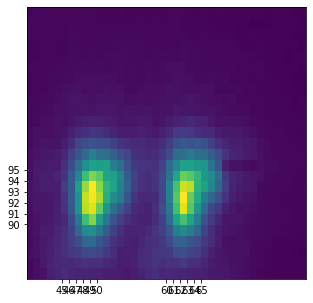

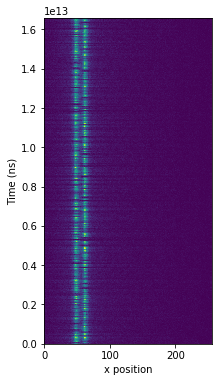

In [15]:
plt.figure(figsize=(5, 5))
#filename = 'xscan_402s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)



In [16]:
filename = 'x_402.5_y_156'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'yscan_156'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,164,198,0,1975,6
1,91,49,1652224,3175,9
2,95,63,9651456,875,4
3,88,62,19121408,2700,7
4,84,49,23623680,1725,6
...,...,...,...,...,...
1391750,99,54,16594448308736,1400,4
1391751,114,1,16594451946752,600,2
1391752,91,48,16594466099456,2825,7
1391753,91,61,16594475368448,1075,4


yscan_156          Unnamed: 0    y    x            time  center flux  cluster size
0                 0  164  198               0         1975             6
1                 1   91   49         1652224         3175             9
2                 2   95   63         9651456          875             4
3                 3   88   62        19121408         2700             7
4                 4   84   49        23623680         1725             6
...             ...  ...  ...             ...          ...           ...
1391750     1391750   99   54  16594448308736         1400             4
1391751     1391751  114    1  16594451946752          600             2
1391752     1391752   91   48  16594466099456         2825             7
1391753     1391753   91   61  16594475368448         1075             4
1391754     1391754   61   93  16594482159616         1050             4

[1391755 rows x 6 columns]


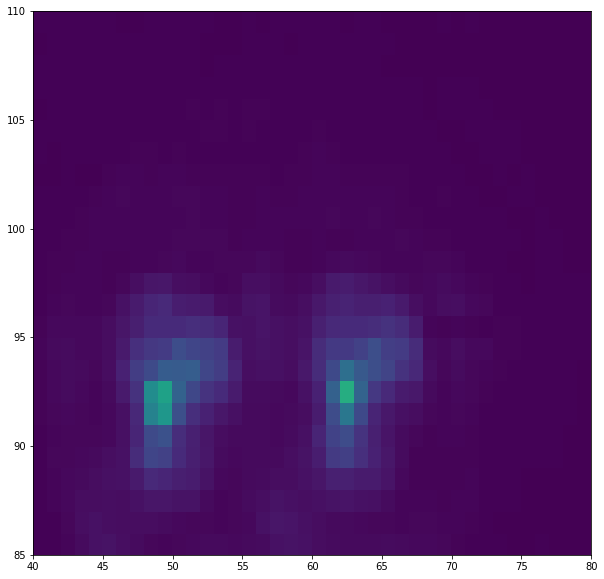

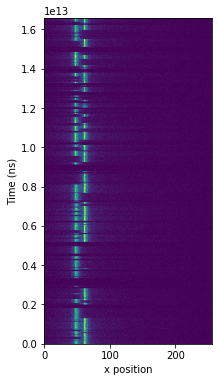

In [17]:
plt.figure(figsize=(10, 10))
#filename = 'xscan_402s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
#plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
#plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 93



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

